In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

In [2]:
df = pd.read_csv("adult.csv")   

In [3]:
print(df.head())
print("\nShape:", df.shape)

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [4]:
df = df.replace("?", np.nan)

In [5]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [6]:
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (30162, 15)


In [7]:
df.reset_index(drop=True, inplace=True)

print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (30162, 15)


In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numeric columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [9]:
print("📊 Descriptive Statistics (Numerical):")
display(df[num_cols].describe())

# Skewness & Kurtosis
for col in num_cols:
    print(f"{col}: Skewness={skew(df[col]):.2f}, Kurtosis={kurtosis(df[col]):.2f}")


📊 Descriptive Statistics (Numerical):


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


age: Skewness=0.53, Kurtosis=-0.14
fnlwgt: Skewness=1.46, Kurtosis=6.39
education.num: Skewness=-0.31, Kurtosis=0.64
capital.gain: Skewness=11.90, Kurtosis=153.64
capital.loss: Skewness=4.53, Kurtosis=19.51
hours.per.week: Skewness=0.33, Kurtosis=3.17


In [10]:
print("📊 Value Counts (Categorical):")
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts().head())


📊 Value Counts (Categorical):

workclass:
 workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Name: count, dtype: int64

education:
 education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
Name: count, dtype: int64

marital.status:
 marital.status
Married-civ-spouse    14065
Never-married          9726
Divorced               4214
Separated               939
Widowed                 827
Name: count, dtype: int64

occupation:
 occupation
Prof-specialty     4038
Craft-repair       4030
Exec-managerial    3992
Adm-clerical       3721
Sales              3584
Name: count, dtype: int64

relationship:
 relationship
Husband          12463
Not-in-family     7726
Own-child         4466
Unmarried         3212
Wife              1406
Name: count, dtype: int64

race:
 race
White                 25933
Black                  2817
Asian-Pac-Islander      895


## Measures of Central Tendency (Mean, Median, Mode)

In [11]:
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode().iloc[0]
print('Mean:\n', mean)
print('\nMedian:\n', median)
print('\nMode:\n', mode)

Mean:
 age                   38.437902
fnlwgt            189793.833930
education.num         10.121312
capital.gain        1092.007858
capital.loss          88.372489
hours.per.week        40.931238
dtype: float64

Median:
 age                   37.0
fnlwgt            178425.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
dtype: float64

Mode:
 age                               36
workclass                    Private
fnlwgt                        203488
education                    HS-grad
education.num                      9
marital.status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race                           White
sex                             Male
capital.gain                       0
capital.loss                       0
hours.per.week                    40
native.country         United-States
income                         <=50K
Name: 0, dtype: object


## Measures of Dispersion (Variance, Standard Deviation, Range)

In [12]:
variance = df.var(numeric_only=True)
std_dev = df.std(numeric_only=True)
data_range = df.max(numeric_only=True) - df.min(numeric_only=True)
print('Variance:\n', variance)
print('\nStandard Deviation:\n', std_dev)
print('\nRange:\n', data_range)

Variance:
 age               1.725194e+02
fnlwgt            1.116255e+10
education.num     6.502474e+00
capital.gain      5.485397e+07
capital.loss      1.634572e+05
hours.per.week    1.435200e+02
dtype: float64

Standard Deviation:
 age                   13.134665
fnlwgt            105652.971529
education.num          2.549995
capital.gain        7406.346497
capital.loss         404.298370
hours.per.week        11.979984
dtype: float64

Range:
 age                    73
fnlwgt            1470936
education.num          15
capital.gain        99999
capital.loss         4356
hours.per.week         98
dtype: int64


## Frequency Distribution (for a categorical column, e.g., 'education')

In [13]:
if 'education' in df.columns:
    freq_dist = df['education'].value_counts()
    print('Frequency Distribution (education):\n', freq_dist)
else:
    print('Column "education" not found for frequency distribution.')

Frequency Distribution (education):
 education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64


## Correlation Analysis

In [14]:
correlation = df.corr(numeric_only=True)
print('Correlation Matrix:\n', correlation)

Correlation Matrix:
                      age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education.num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital.gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital.loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours.per.week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours.per.week  
age                   0.101599  
fnlwgt               -0.022886  
education.num         0.152522  
capital.gain          0.080432  
capital.loss          0.052417  
hours.per.week        1.000000  


## Visualizations: Histogram, Boxplot, Bar Chart, Pairplot, Heatmap

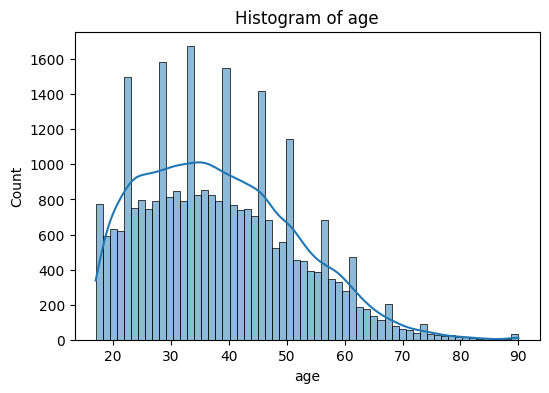

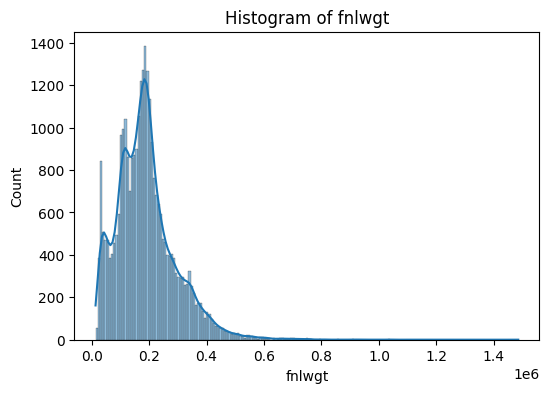

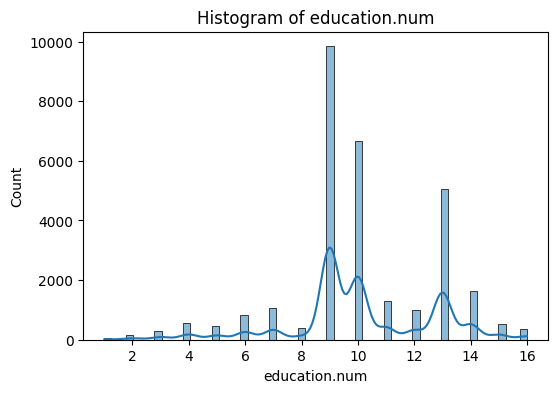

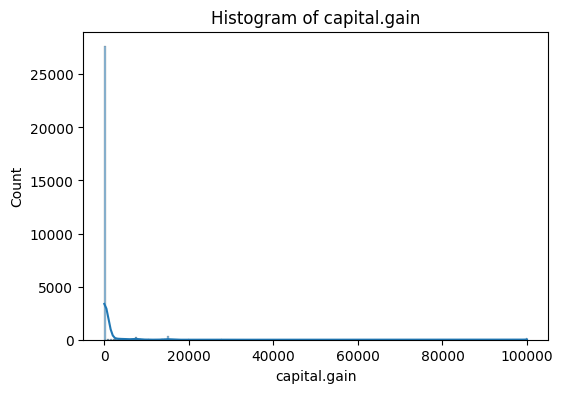

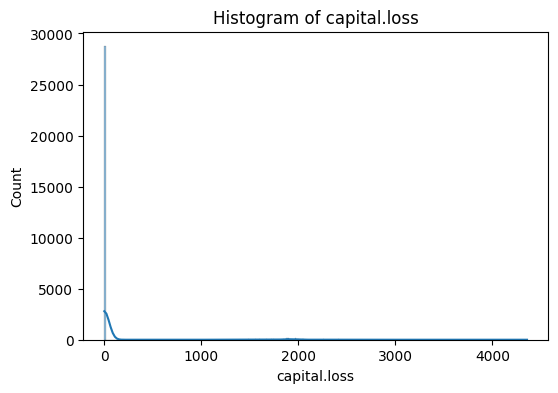

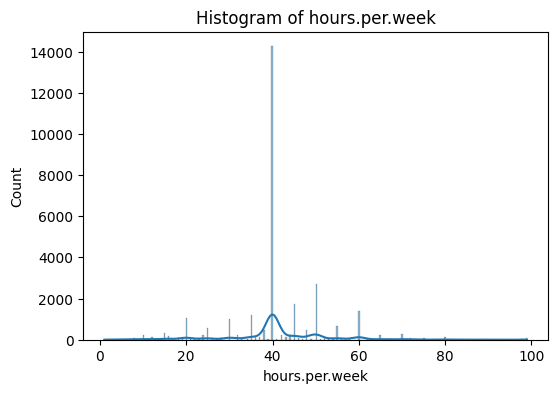

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


C:\Users\gowda\AppData\Local\Temp\ipykernel_10768\2187737635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y=col, data=df, palette="Set2")
C:\Users\gowda\AppData\Local\Temp\ipykernel_10768\2187737635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y=col, data=df, palette="Set2")
C:\Users\gowda\AppData\Local\Temp\ipykernel_10768\2187737635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y=col, data=df, palette="Set2")
C:\Users\gowda\AppData\Local\Temp\ipykernel_10768\2187737635.py:5: FutureWar

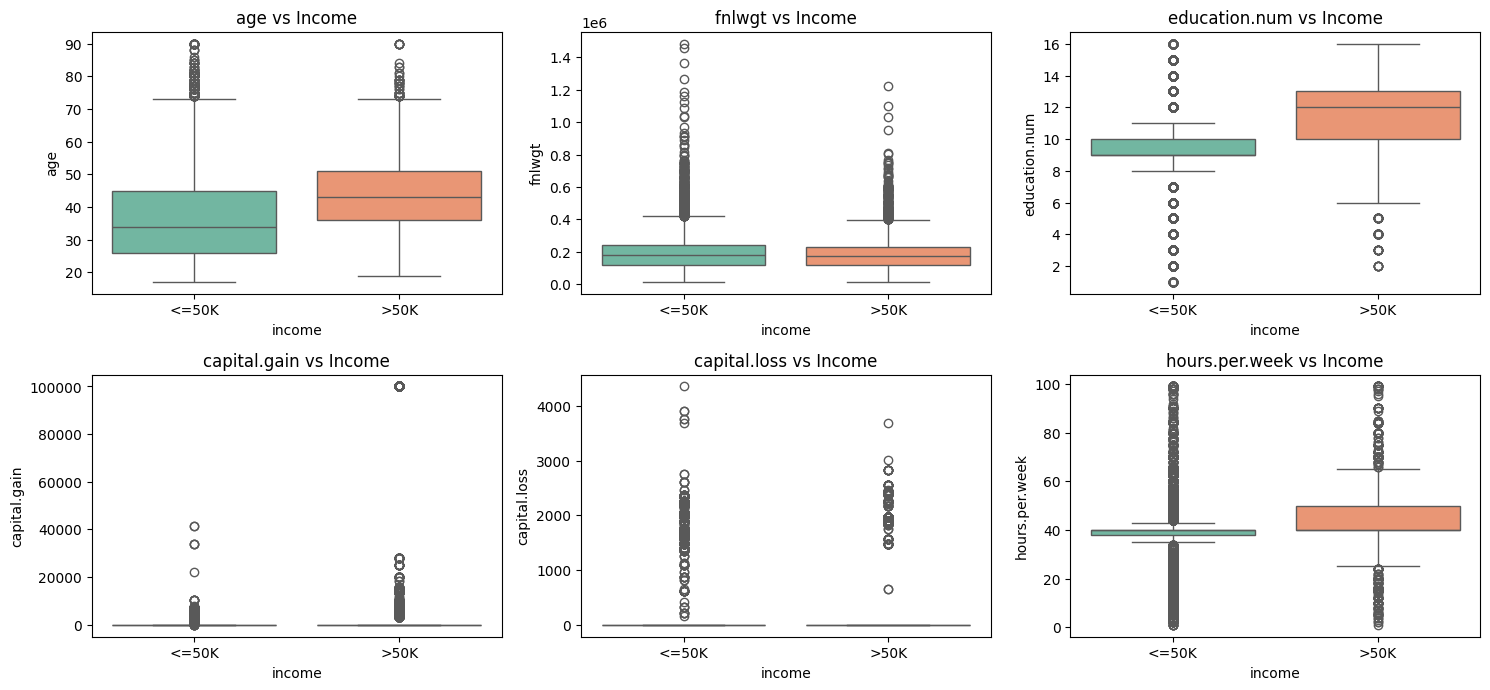

In [17]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # Adjust rows/cols depending on number of features
    sns.boxplot(x="income", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Income")

plt.tight_layout()
plt.show()


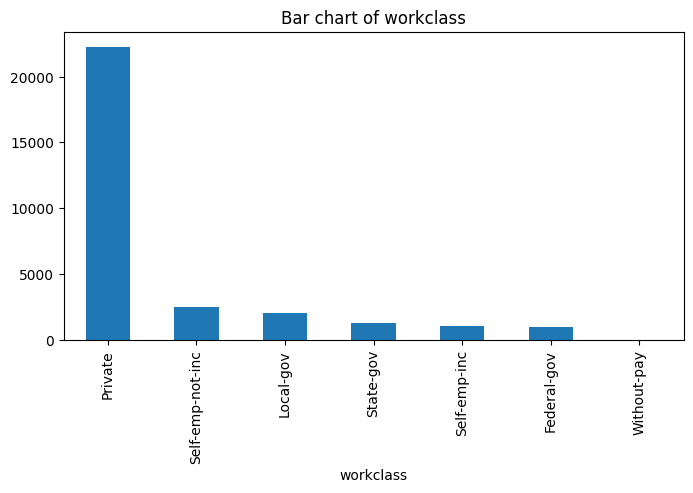

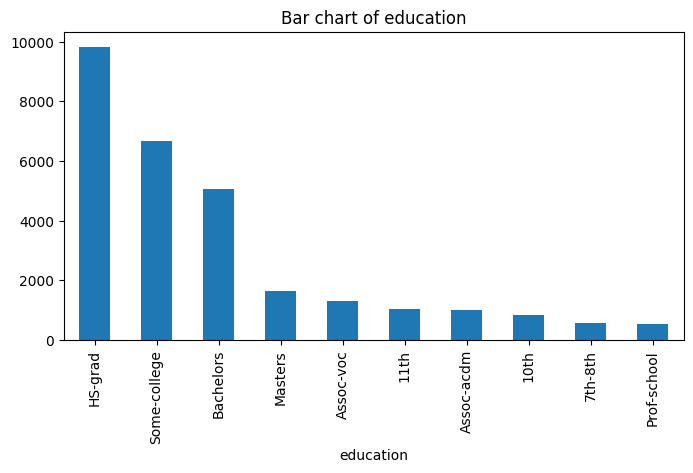

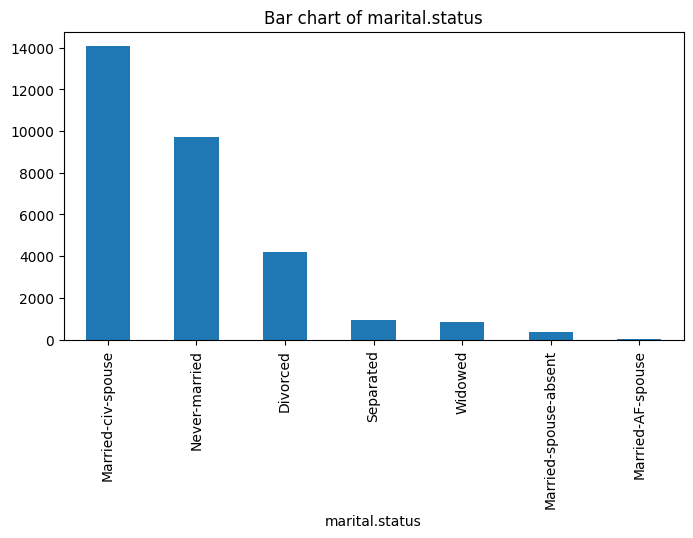

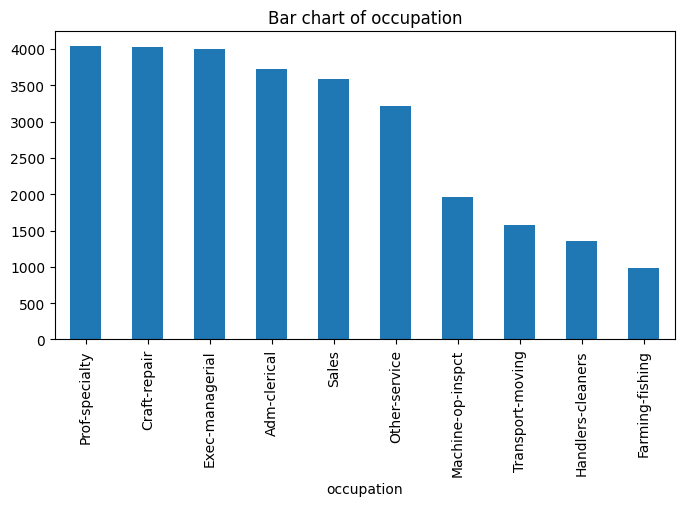

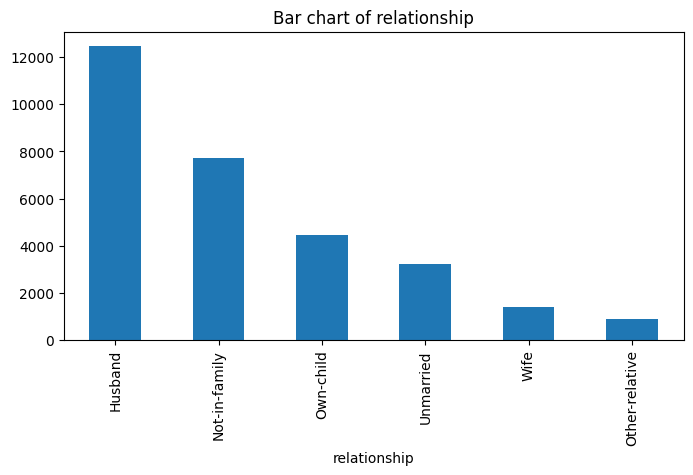

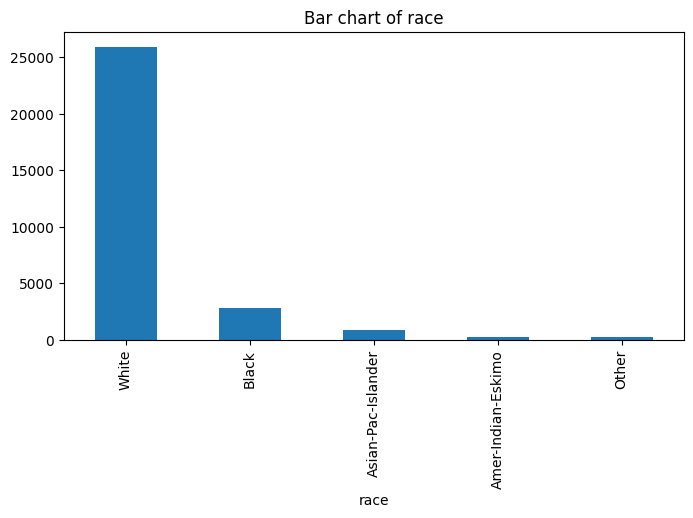

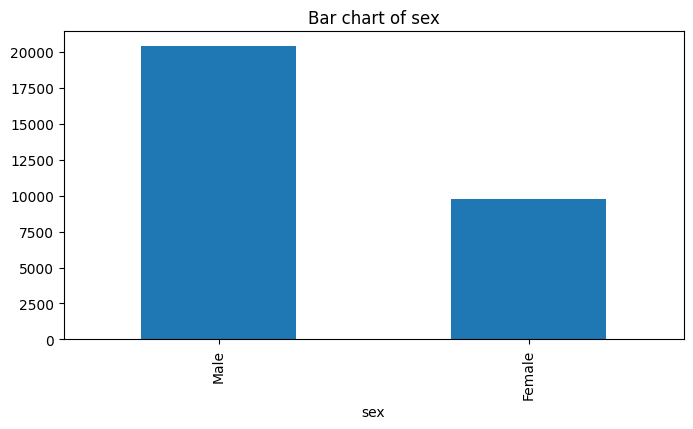

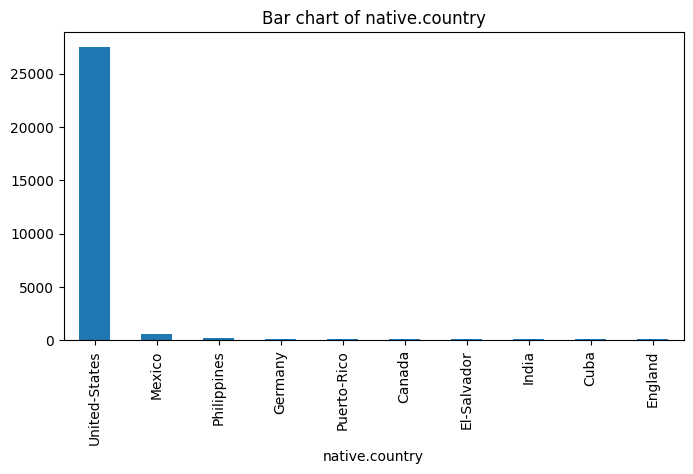

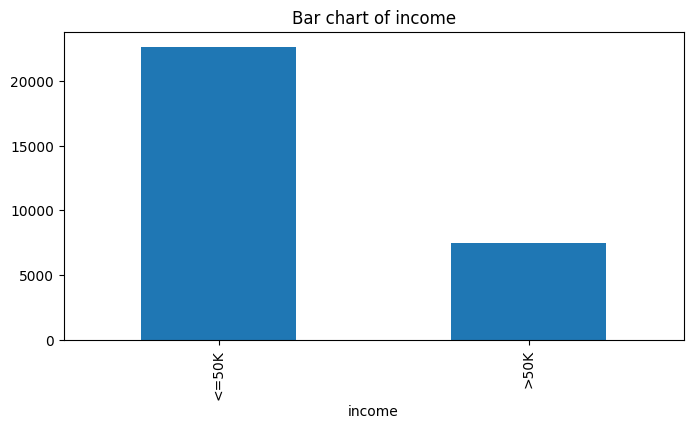

In [19]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')  # top 10
    plt.title(f"Bar chart of {col}")
    plt.show()


<Figure size 1200x1000 with 0 Axes>

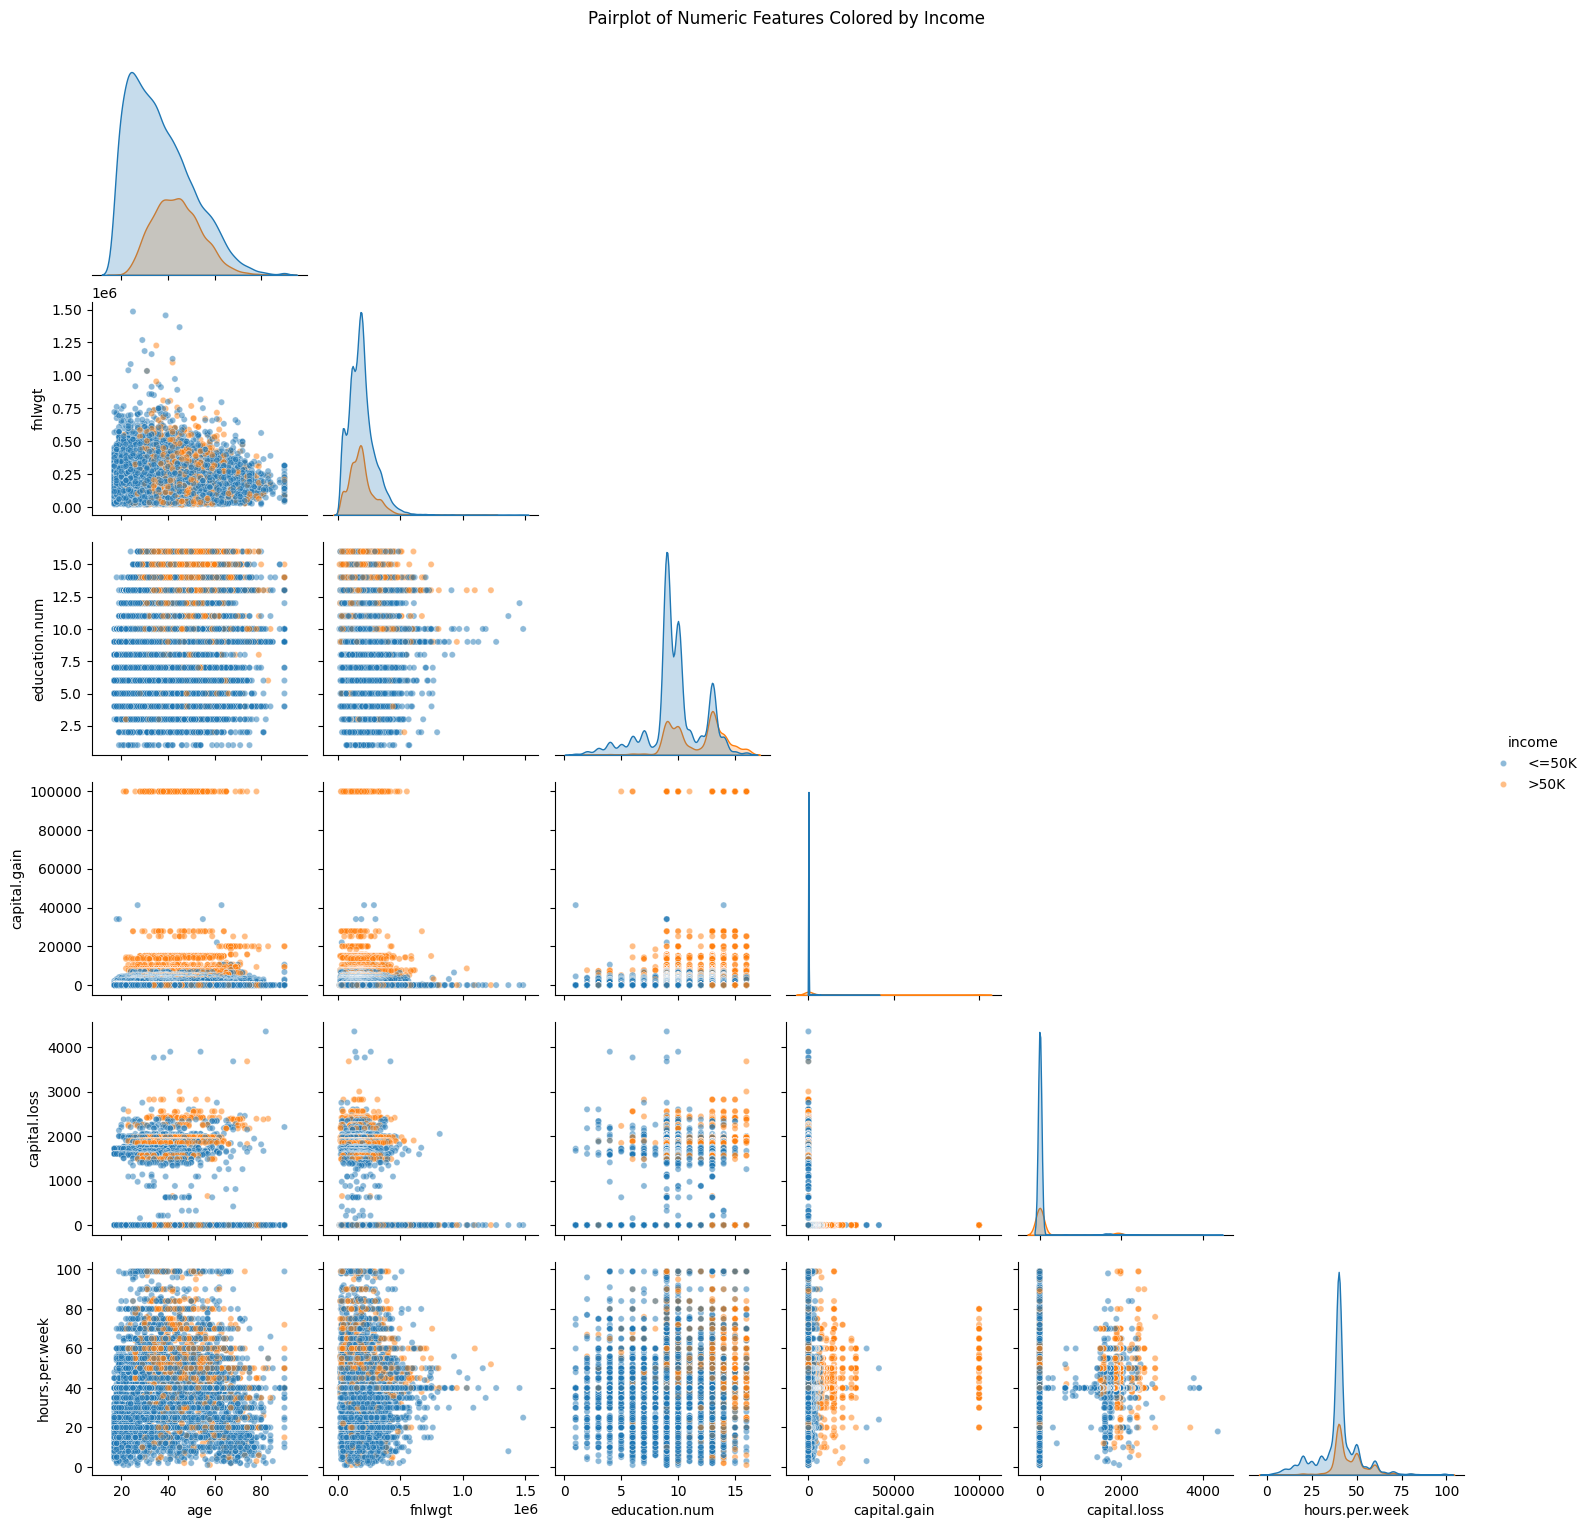

In [20]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[num_cols.tolist() + ['income']], 
             hue='income', 
             diag_kind='kde', 
             corner=True, 
             plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairplot of Numeric Features Colored by Income", y=1.02)
plt.show()


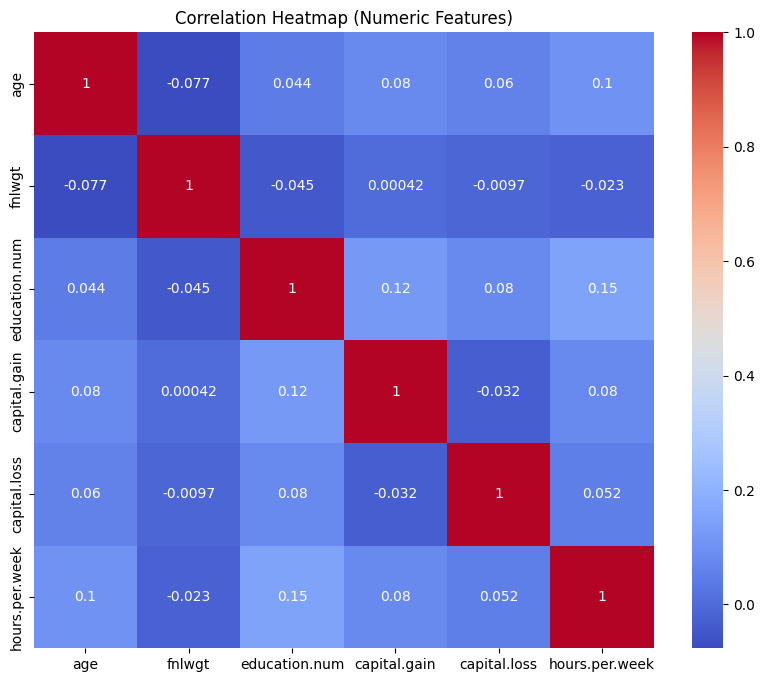

In [18]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Skewness – Measures Asymmetry of Distribution

In [25]:
skewness = df.skew(numeric_only=True)
print('Skewness:\n', skewness)

Skewness:
 age                0.530228
fnlwgt             1.459220
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
dtype: float64


## Kurtosis – Measures the “Peakedness” of the Distribution

In [31]:
kurtosis = df.kurtosis(numeric_only=True)
print('Kurtosis:\n', kurtosis)

Kurtosis:
 age                -0.144674
fnlwgt              6.394133
education.num       0.643723
capital.gain      153.666375
capital.loss       19.510871
hours.per.week      3.167888
dtype: float64


Percentiles & Quartiles

In [32]:
print("\n📌 Percentiles & Quartiles")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"\nColumn: {col}")
    print("Q1 (25%):", Q1)
    print("Median (Q2 - 50%):", Q2)
    print("Q3 (75%):", Q3)
    print("IQR:", IQR)


📌 Percentiles & Quartiles

Column: age
Q1 (25%): 28.0
Median (Q2 - 50%): 37.0
Q3 (75%): 47.0
IQR: 19.0

Column: fnlwgt
Q1 (25%): 117627.25
Median (Q2 - 50%): 178425.0
Q3 (75%): 237628.5
IQR: 120001.25

Column: education.num
Q1 (25%): 9.0
Median (Q2 - 50%): 10.0
Q3 (75%): 13.0
IQR: 4.0

Column: capital.gain
Q1 (25%): 0.0
Median (Q2 - 50%): 0.0
Q3 (75%): 0.0
IQR: 0.0

Column: capital.loss
Q1 (25%): 0.0
Median (Q2 - 50%): 0.0
Q3 (75%): 0.0
IQR: 0.0

Column: hours.per.week
Q1 (25%): 40.0
Median (Q2 - 50%): 40.0
Q3 (75%): 45.0
IQR: 5.0


## Coefficient of Variation (CV)

In [28]:
# 📌 Coefficient of Variation (CV = std / mean)
print("\n📊 Coefficient of Variation (CV)")
for col in num_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    cv = round(std_val / mean_val, 3) if mean_val != 0 else None
    print(f"  {col}: CV = {cv}")


📊 Coefficient of Variation (CV)
  age: CV = 0.342
  fnlwgt: CV = 0.557
  education.num: CV = 0.252
  capital.gain: CV = 6.782
  capital.loss: CV = 4.575
  hours.per.week: CV = 0.293


## Z-scores – Standardizing Values

In [22]:
z_scores = df[num_cols].apply(zscore)
print("📊 Z-scores (first 5 rows):")
z_scores.head()


📊 Z-scores (first 5 rows):


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3.316630,-0.538790,-0.439738,-0.147445,10.555814,-1.914161
1,1.184831,-0.467906,-2.400559,-0.147445,9.427915,-0.077734
2,0.195067,0.708645,-0.047574,-0.147445,9.427915,-0.077734
3,-0.337883,0.256222,-0.439738,-0.147445,9.106365,0.339636
4,-0.033340,-0.370964,-1.616231,-0.147445,9.106365,-0.077734


## Interquartile Range (IQR)

In [29]:
# 📊 Interquartile Range (IQR)
print("\n📊 Interquartile Range (IQR)")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: IQR = {IQR}")



📊 Interquartile Range (IQR)
age: IQR = 19.0
fnlwgt: IQR = 120001.25
education.num: IQR = 4.0
capital.gain: IQR = 0.0
capital.loss: IQR = 0.0
hours.per.week: IQR = 5.0


In [30]:
print("\n📊 Cross-tabulation (Categorical Variables)")

cat_cols = df.select_dtypes(include='object').columns

ct = pd.crosstab(df['education'], df['income'])
print(ct)

ct_percent = pd.crosstab(df['education'], df['income'], normalize='index') * 100
print("\n📊 Cross-tabulation in % (row-wise)")
print(ct_percent.round(2))



📊 Cross-tabulation (Categorical Variables)
income        <=50K  >50K
education                
10th            761    59
11th            989    59
12th            348    29
1st-4th         145     6
5th-6th         276    12
7th-8th         522    35
9th             430    25
Assoc-acdm      752   256
Assoc-voc       963   344
Bachelors      2918  2126
Doctorate        95   280
HS-grad        8223  1617
Masters         709   918
Preschool        45     0
Prof-school     136   406
Some-college   5342  1336

📊 Cross-tabulation in % (row-wise)
income         <=50K   >50K
education                  
10th           92.80   7.20
11th           94.37   5.63
12th           92.31   7.69
1st-4th        96.03   3.97
5th-6th        95.83   4.17
7th-8th        93.72   6.28
9th            94.51   5.49
Assoc-acdm     74.60  25.40
Assoc-voc      73.68  26.32
Bachelors      57.85  42.15
Doctorate      25.33  74.67
HS-grad        83.57  16.43
Masters        43.58  56.42
Preschool     100.00   0.00
Prof